In [74]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import statistics
from matplotlib import pyplot as plt
from matplotlib import patches
%matplotlib inline

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['figure.figsize'] = (15,10)

for dirname, _, filenames in os.walk('/.kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/.kaggle/input\all-marvel-cinematic-universe-movies-on-imdb.zip
/.kaggle/input\international-energy-statistics.zip
/.kaggle/input\vgsales.csv
/.kaggle/input\videogamesales.zip
/.kaggle/input\videogamesales\vgsales.csv


In [4]:
df = pd.read_csv('/.kaggle/input/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [13]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
mean = df['Year'].mean()
df['Year'].fillna(mean, inplace=True)

df['Publisher'].fillna('Unknown', inplace=True)

In [27]:
sales_by_year = df.groupby(df['Year'],as_index = False).sum()

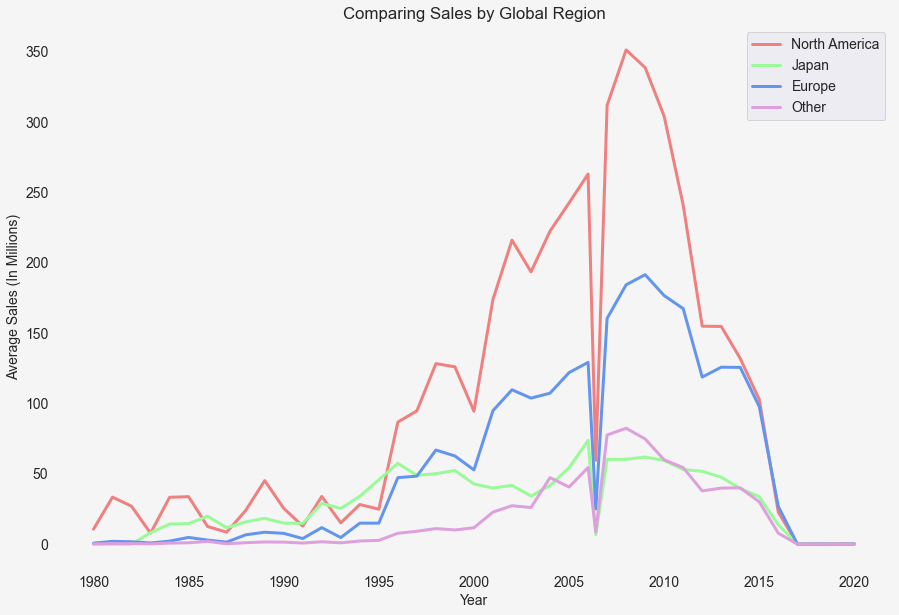

In [160]:
fig = plt.figure(facecolor='whitesmoke')
ax = fig.add_subplot(111)

ax.plot(sales_by_year['Year'], sales_by_year['NA_Sales'],color='lightcoral')
ax.plot(sales_by_year['Year'], sales_by_year['JP_Sales'],color='palegreen')
ax.plot(sales_by_year['Year'], sales_by_year['EU_Sales'],color='cornflowerblue')
ax.plot(sales_by_year['Year'], sales_by_year['Other_Sales'],color='plum')
ax.legend(['North America', 'Japan','Europe','Other'])
ax.set_facecolor('whitesmoke')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sales (In Millions)')
ax.set_title('Comparing Sales by Global Region')

for pos in ['right','left','bottom','top']:
    ax.spines[pos].set_visible(False)
    
plt.savefig('ComparingSaleByRegion.png')

In [56]:
pub_na = df.groupby('Publisher')['NA_Sales'].sum().reset_index()
pub_na['Percentages'] = pub_na['NA_Sales']/sum(pub_na['NA_Sales'])*100
pub_na['Percentages']= round(pub_na['Percentages'],2)
pub_na.sort_values(by='Percentages', ascending=False, inplace=True)
percent_top_10_na = round(sum(pub_na['Percentages'][:10]),2)

<ipython-input-161-4806b3abe30f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_na.sort_values(by='Percentages', inplace=True)
<ipython-input-161-4806b3abe30f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_na['Total'] = 100


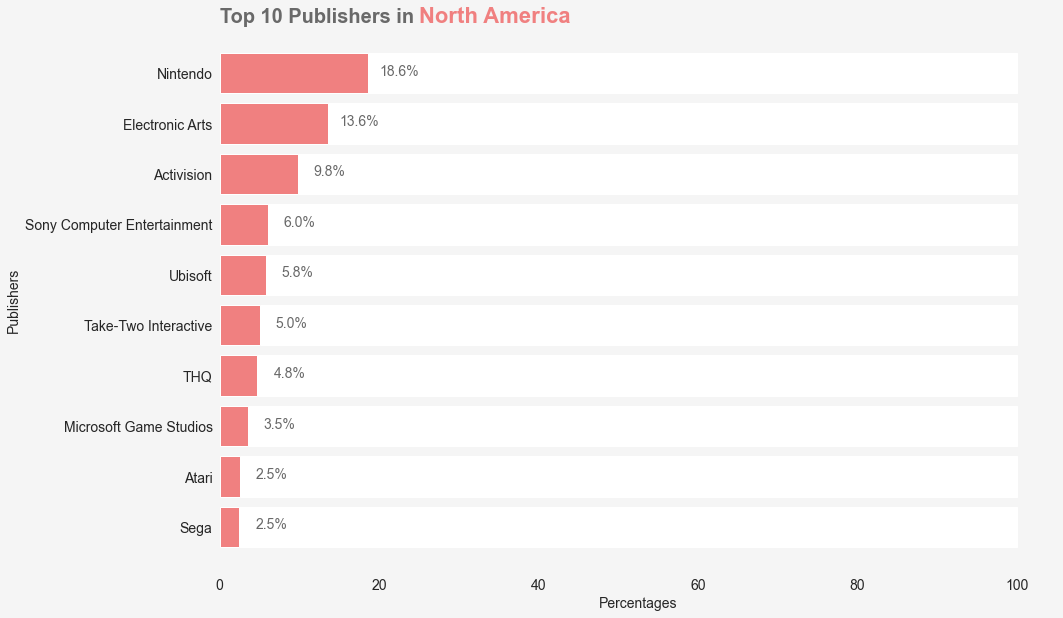

In [161]:
top_10_na = pub_na.head(10)
top_10_na.sort_values(by='Percentages', inplace=True)
top_10_na['Total'] = 100

fig = plt.figure(facecolor='whitesmoke')
ax = fig.add_subplot(111)

ax.barh(width=top_10_na['Total'], y=top_10_na['Publisher'], color='white')
ax.barh(width=top_10_na['Percentages'], y=top_10_na['Publisher'],color = 'lightcoral')
ax.text(0, 10, 'Top 10 Publishers in', color ='dimgrey', fontsize = 20, weight = 'bold')
ax.text(25, 10, 'North America', color='lightcoral', fontsize = 22, weight = 'bold')
ax.set_facecolor('whitesmoke')
ax.set_xlabel('Percentages')
ax.set_ylabel('Publishers')

for pos in ['right','left','bottom','top']:
    ax.spines[pos].set_visible(False)

for p in ax.patches[10:]:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(width), 
                (4+ width, y + height*0.45), 
                ha='center', 
                fontsize=14, 
                color='dimgrey')
    
plt.savefig('TopPublishers.png')

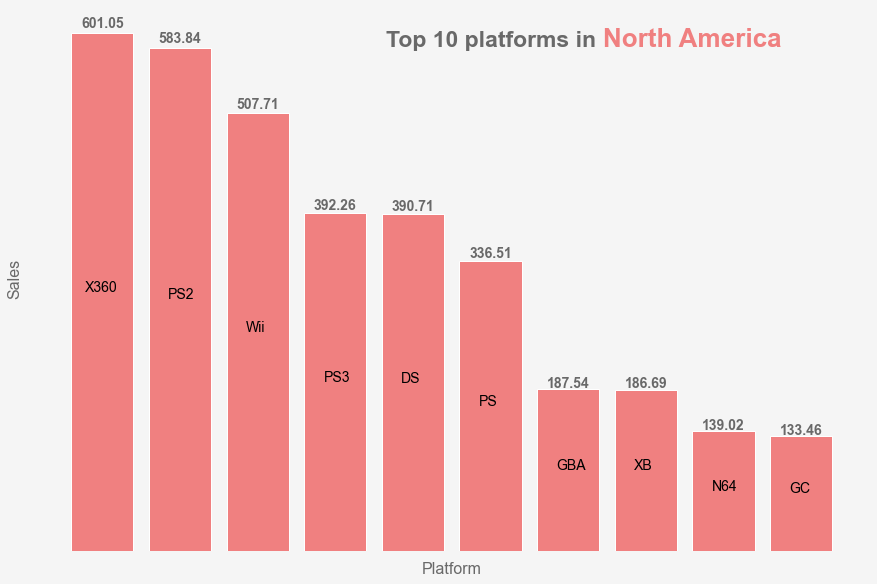

In [162]:
platform_na = df.groupby('Platform')['NA_Sales'].sum().reset_index()
platform_na.sort_values(by='NA_Sales', ascending=False, inplace=True)
platform_na_top_10 = group_platform_na.head(10).reset_index()
platform_na_top_10.drop('index', inplace=True, axis=1)

fig = plt.figure(facecolor='whitesmoke')
ax = fig.add_subplot(111)

ax.bar(height=platform_na_top_10['NA_Sales'], x=platform_na_top_10['Platform'], color = 'lightcoral')
ax.set_facecolor('whitesmoke')
ax.set_xlabel('Platform', fontsize = 16, color = 'dimgrey')
ax.set_ylabel('Sales', fontsize = 16, color = 'dimgrey')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(3.65, 585, 'Top 10 platforms in', color='dimgrey', fontsize = 23, weight ='bold')
ax.text(6.45, 585, 'North America', color='lightcoral', fontsize = 26, weight = 'bold')

for pos in ['right','left','bottom','top']:
    ax.spines[pos].set_visible(False)

heights = []

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    heights.append(height)
    ax.annotate('{:.2f}'.format(height), 
                (x + width/2, y + height*1.01), 
                ha='center', 
                fontsize = 14, 
                color='dimgrey',
                weight = 'bold')

ax.text(-0.23, heights[0]/2, group_platform_na_top_10['Platform'][0], color='black', fontsize=14)
ax.text(0.85, heights[1]/2, group_platform_na_top_10['Platform'][1], color='black', fontsize=14)
ax.text(1.85, heights[2]/2, group_platform_na_top_10['Platform'][2], color='black', fontsize=14)
ax.text(2.85, heights[3]/2, group_platform_na_top_10['Platform'][3], color='black', fontsize=14)
ax.text(3.85, heights[4]/2, group_platform_na_top_10['Platform'][4], color='black', fontsize=14)
ax.text(4.85, heights[5]/2, group_platform_na_top_10['Platform'][5], color='black', fontsize=14)
ax.text(5.85, heights[6]/2, group_platform_na_top_10['Platform'][6], color='black', fontsize=14)
ax.text(6.85, heights[7]/2, group_platform_na_top_10['Platform'][7], color='black', fontsize=14)
ax.text(7.85, heights[8]/2, group_platform_na_top_10['Platform'][8], color='black', fontsize=14)
ax.text(8.85, heights[9]/2, group_platform_na_top_10['Platform'][9], color='black', fontsize=14)

plt.savefig('TopPlatforms.png')